In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import minmax_scale

from ssl_wafermap.utilities.plotting import (
    ax_thiccify,
    init_seaborn_style,
    legend_thiccify,
    matplotlibify,
)

init_seaborn_style()

# Ignore warning about using plotly palettes in seaborn
warnings.filterwarnings("ignore", message=".*palette list.*")

In [2]:
f1_df = pd.read_pickle("../data/processed/model_logs/knn_f1.pkl.xz")
f1_crop_df = pd.read_pickle("../data/processed/model_logs/knn_f1_crop.pkl.xz")
rep_df = pd.read_pickle("../data/processed/model_logs/knn_rep_std.pkl.xz")
loss_df = pd.read_pickle("../data/processed/model_logs/knn_loss.pkl.xz")

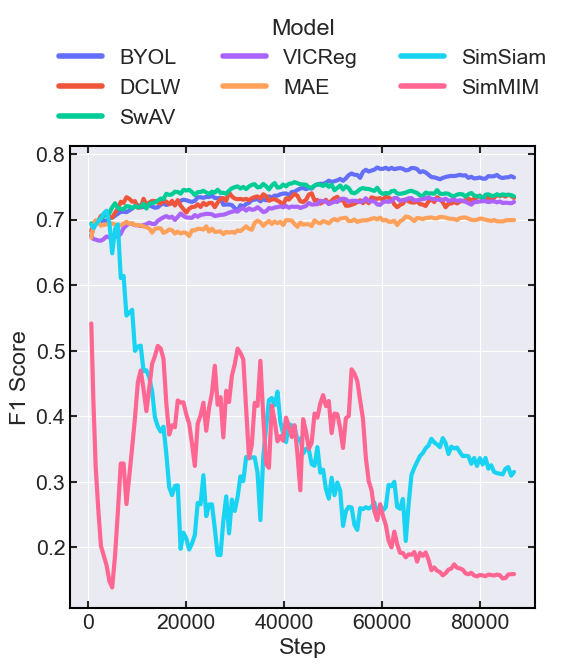

In [18]:
plot_columns = ["Step", "BYOL", "DCLW", "SwAV", "VICReg", "MAE", "SimSiam", "SimMIM"]
# plot_columns = ["Step", "DCLW", "SwAV", "BYOL", "VICReg", "MAE", "SimSiam", "SimMIM"]

plot_df = pd.melt(
    f1_df[plot_columns].ewm(alpha=0.6).mean(), id_vars="Step", var_name="Model", value_name="F1 Score"
)

fig, ax = plt.subplots(figsize=(6, 6))
ax_thiccify(ax)
sns.lineplot(
    data=plot_df,
    x="Step",
    y="F1 Score",
    hue="Model",
    lw=3,
    # alpha=0.9,
    legend="full",
    ax=ax,
    palette=px.colors.qualitative.Plotly,
)
legend = plt.legend()
for line in legend.get_lines():
    line.set_linewidth(4)
sns.move_legend(
    ax, "lower center", bbox_to_anchor=(.5, 1), title="Model", ncol=3, frameon=False
)
# legend_thiccify(ax, legend_title="Model")
plt.savefig("../reports/figures/knn_f1_seaborn.png", dpi=300, bbox_inches="tight")
plt.show()

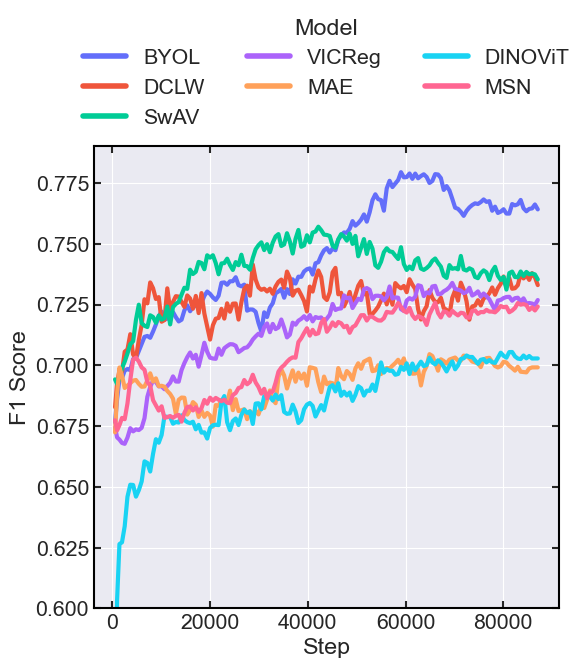

In [13]:
plot_columns = ["Step", "BYOL", "DCLW", "SwAV", "VICReg", "MAE", "DINOViT", "MSN"]

plot_df = pd.melt(
    f1_df[plot_columns].ewm(alpha=0.6).mean(), id_vars="Step", var_name="Model", value_name="F1 Score"
)

fig, ax = plt.subplots(figsize=(6, 6))
ax_thiccify(ax)
sns.lineplot(
    data=plot_df,
    x="Step",
    y="F1 Score",
    hue="Model",
    lw=3,
    # alpha=0.9,
    legend="full",
    ax=ax,
    palette=px.colors.qualitative.Plotly,
)
# legend_thiccify(ax, legend_title="Model")
legend = plt.legend()
for line in legend.get_lines():
    line.set_linewidth(4)
sns.move_legend(
    ax, "lower center", bbox_to_anchor=(.5, 1), title="Model", ncol=3, frameon=False
)
ax.set_ylim(0.6, 0.79)
plt.savefig("../reports/figures/knn_f1_seaborn_top.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
fig = px.line(
    plot_df,
    x="Step",
    y="F1 Score",
    color="Model",
    width=700,
    height=400,
    color_discrete_sequence=px.colors.qualitative.Plotly,
)
fig.update_traces(line_width=4, opacity=0.9)
fig, scale = matplotlibify(fig, font_size=20)
# fig.write_image("../reports/figures/knn_f1_plotly.png", scale=3)
fig.show()

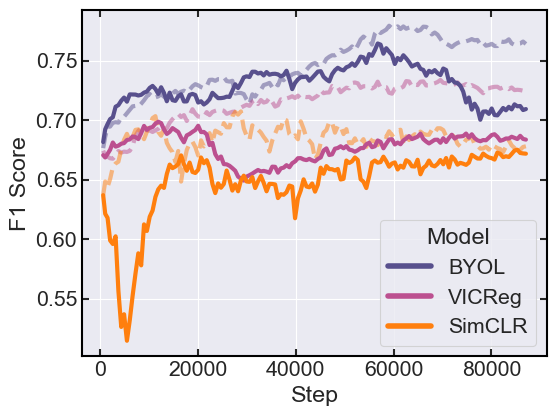

In [59]:
plot_columns = ["Step", "BYOL", "SimCLR", "VICReg"]

plot_df = f1_df[plot_columns].ewm(alpha=0.6).mean()
plot_df_crop = f1_crop_df[plot_columns].ewm(alpha=0.6).mean()

fig, ax = plt.subplots(figsize=(6, 4.5))
ax_thiccify(ax)

# Instead of using seaborn, we need to plot the traces individually

plt.plot(plot_df["Step"], plot_df["BYOL"], lw=3, ls="dashed", color="#58508d", alpha=0.5)
plt.plot(plot_df["Step"], plot_df["VICReg"], lw=3, ls="dashed", color="#bc5090", alpha=0.5)
plt.plot(plot_df["Step"], plot_df["SimCLR"], lw=3, ls="dashed", color=px.colors.qualitative.D3[1], alpha=0.5)


plt.plot(plot_df_crop["Step"], plot_df_crop["BYOL"], lw=3, color="#58508d", label="BYOL")
plt.plot(plot_df_crop["Step"], plot_df_crop["VICReg"], lw=3, color="#bc5090", label="VICReg")
plt.plot(plot_df_crop["Step"], plot_df_crop["SimCLR"], lw=3, color=px.colors.qualitative.D3[1], label="SimCLR")


plt.xlabel("Step")
plt.ylabel("F1 Score")
legend = plt.legend(title="Model")
for line in legend.get_lines():
    line.set_linewidth(4)
plt.savefig("../reports/figures/knn/knn_f1_crop.png", dpi=300, bbox_inches="tight")
plt.show()

## Confusion Matrices

In [85]:
sns.set_theme(style="white")
os.makedirs("../reports/figures/confusion_matrix", exist_ok=True)

BarlowTwins
../models/new_knn\BarlowTwins\confusion_matrix.npz


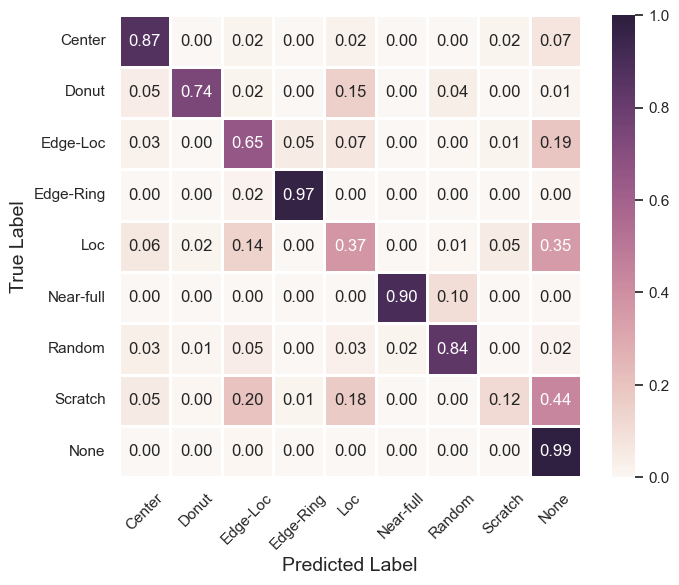

BYOL
../models/new_knn\BYOL\confusion_matrix.npz


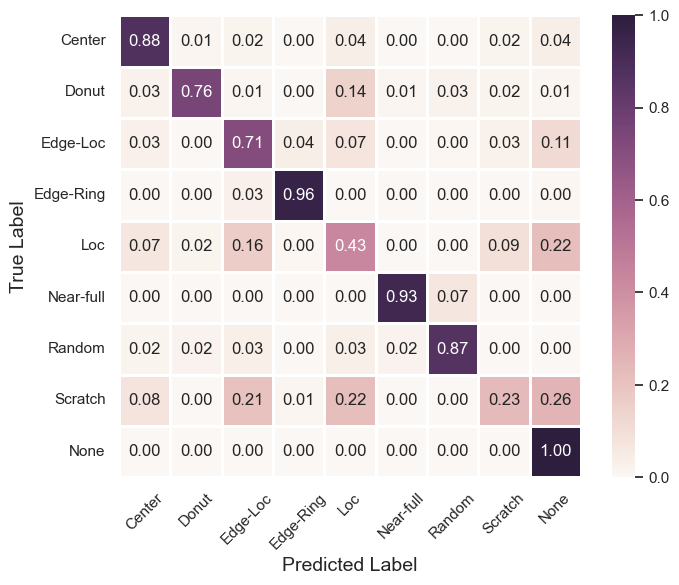

DCLW
../models/new_knn\DCLW\confusion_matrix.npz


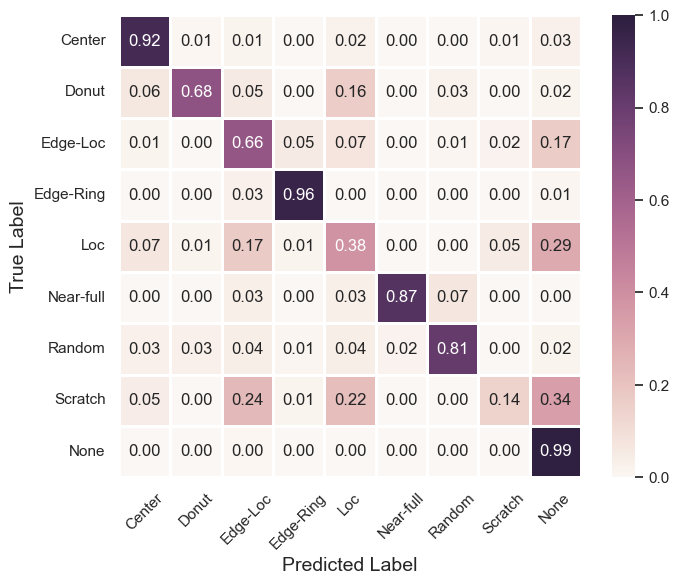

DINO
../models/new_knn\DINO\confusion_matrix.npz


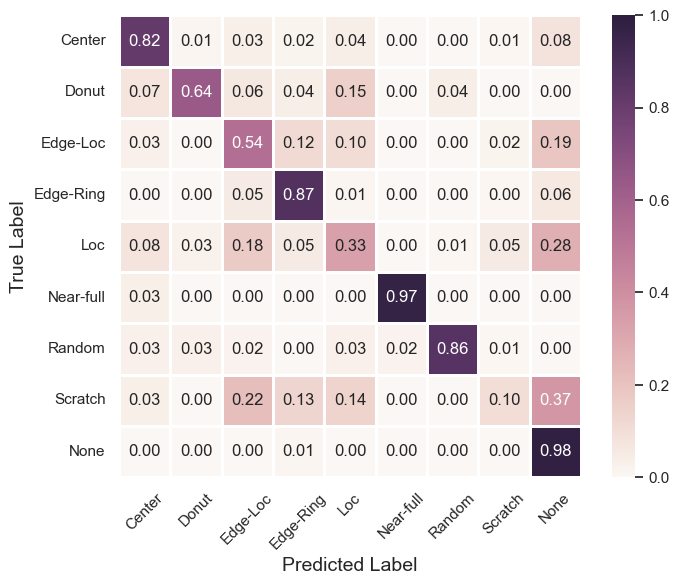

DINOViT
../models/new_knn\DINOViT\confusion_matrix.npz


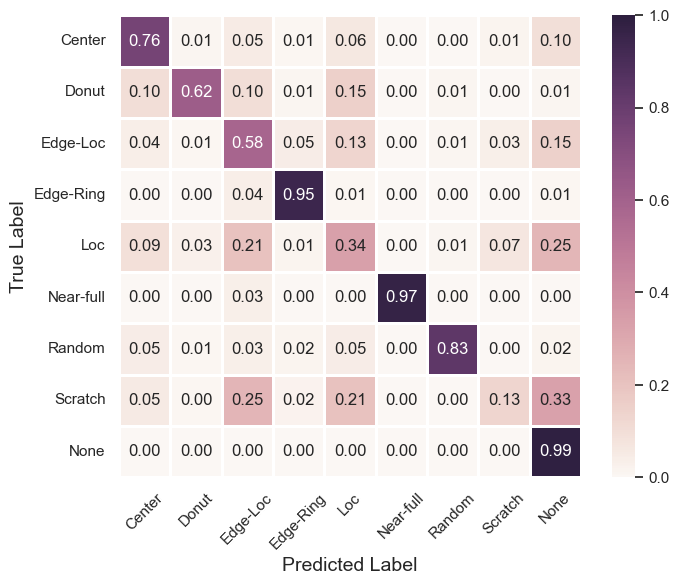

FastSiam
../models/new_knn\FastSiam\confusion_matrix.npz


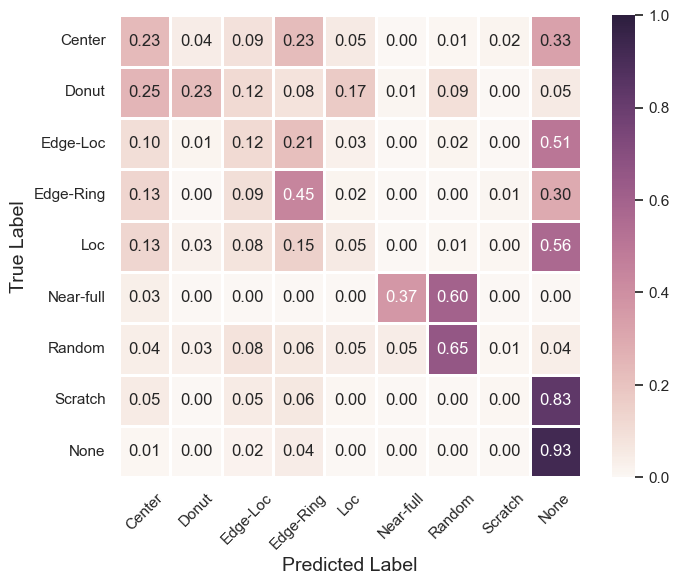

MAE
../models/new_knn\MAE\confusion_matrix.npz


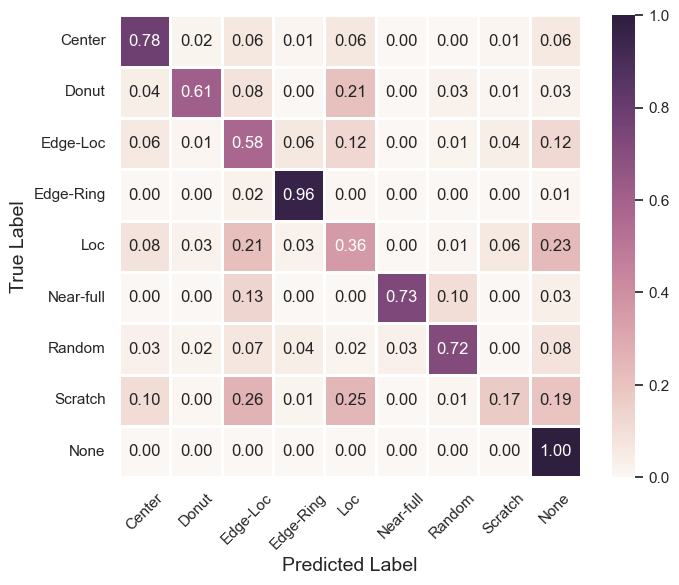

MAE2
../models/new_knn\MAE2\confusion_matrix.npz


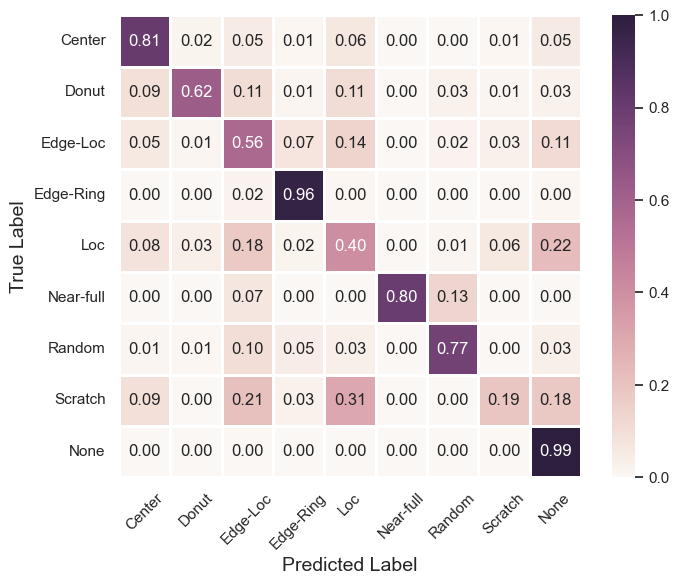

MoCo
../models/new_knn\MoCo\confusion_matrix.npz


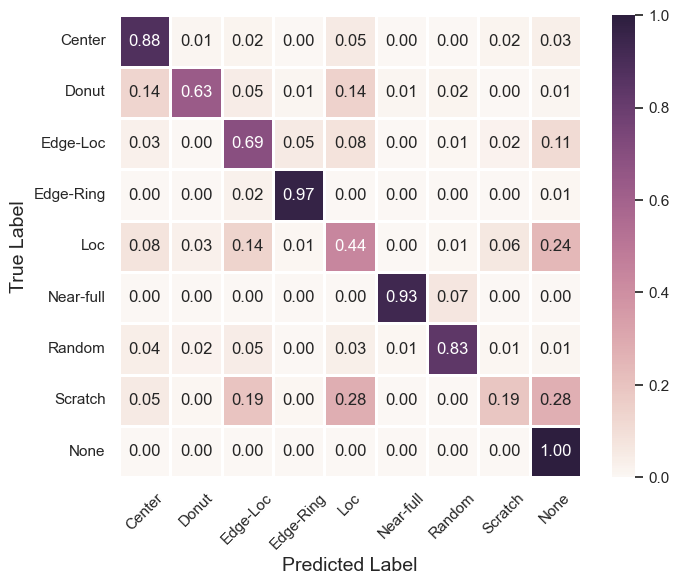

MSN
../models/new_knn\MSN\confusion_matrix.npz


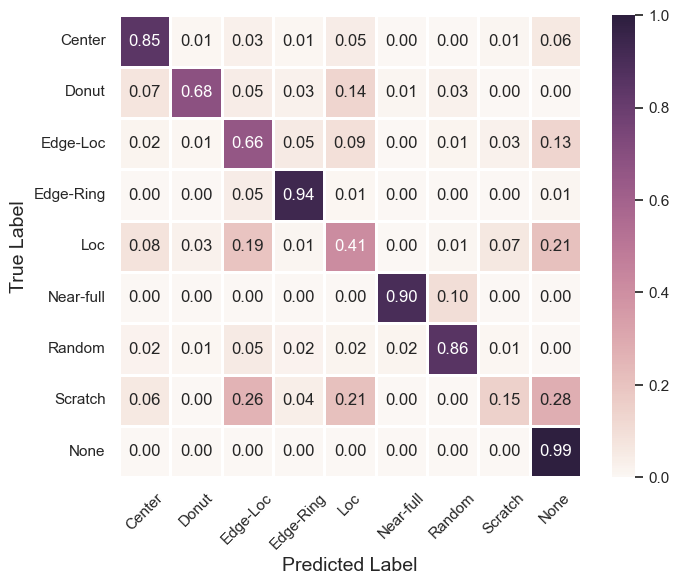

PMSN
../models/new_knn\PMSN\confusion_matrix.npz


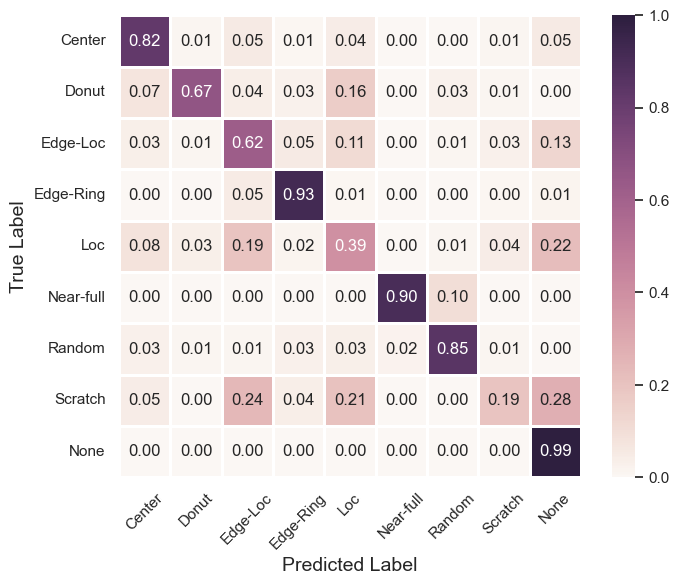

SimCLR
../models/new_knn\SimCLR\confusion_matrix.npz


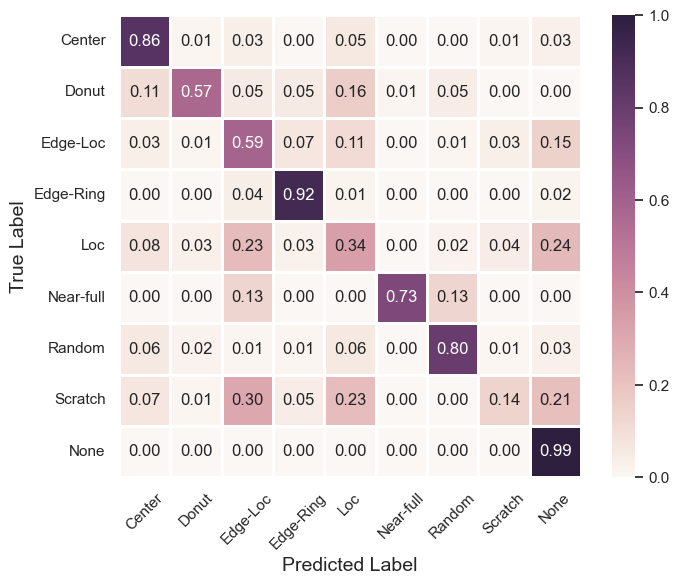

SimMIM
../models/new_knn\SimMIM\confusion_matrix.npz


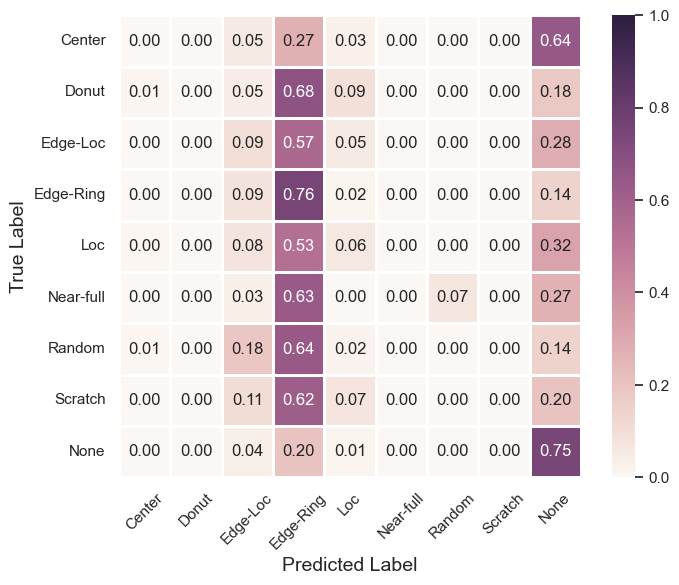

SimSiam
../models/new_knn\SimSiam\confusion_matrix.npz


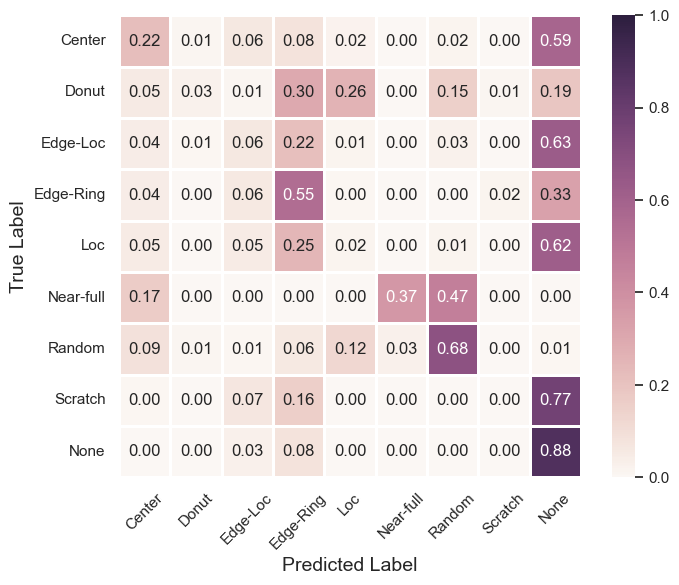

SwaV
../models/new_knn\SwaV\confusion_matrix.npz


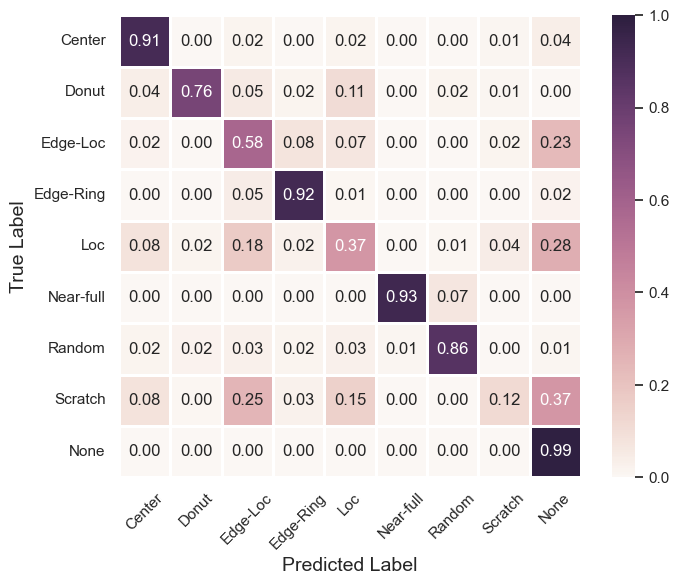

VICReg
../models/new_knn\VICReg\confusion_matrix.npz


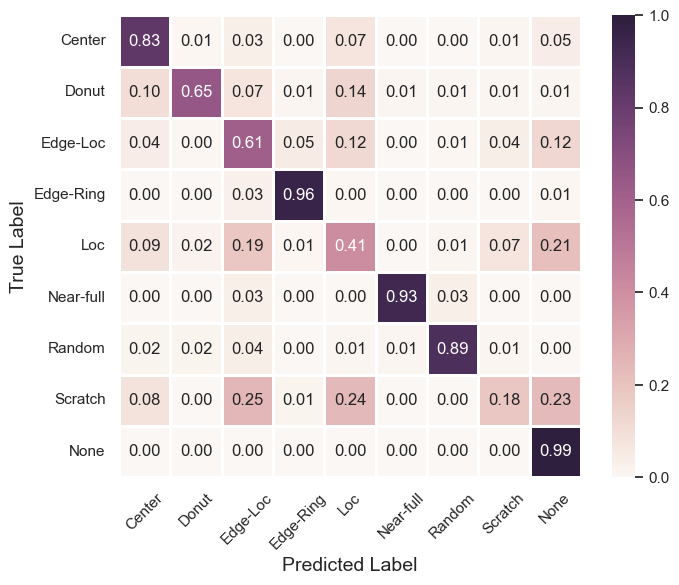

In [87]:
labels = [
    "Center",
    "Donut",
    "Edge-Loc",
    "Edge-Ring",
    "Loc",
    "Near-full",
    "Random",
    "Scratch",
    "None",
]

for root, dirs, files in os.walk("../models/new_knn"):
    for file in files:
        if file.endswith(".npz"):
            name = root.split("\\")[-1]
            print(name)
            print(os.path.join(root, file))
            conf_matrices = np.load(os.path.join(root, file))['confusion_matrix']
            # print(conf_matrices.shape)

            fig, ax = plt.subplots(figsize=(8, 6))
            sns.heatmap(
                conf_matrices[-1],
                annot=True,
                cmap=sns.cubehelix_palette(start=0, light=0.97, as_cmap=True),
                # cmap="Blues",
                square=True,
                linewidths=1,
                fmt=".2f",
                xticklabels=labels,
                yticklabels=labels,
                ax=ax,
                vmax=1,
                vmin=0,
            )
            plt.xticks(rotation=45)
            # plt.yticks(rotation=45)
            ax.set_xlabel("Predicted Label", fontsize=14)
            ax.set_ylabel("True Label", fontsize=14)
            plt.savefig(f"../reports/figures/confusion_matrix/{name}.png", bbox_inches="tight")
            plt.show()

        else:
            break

## Loss and Representation Standard Deviation Plots

In [4]:
rep_df

,Step,BarlowTwins,BYOL,DCLW,DINO,DINOViT,FastSiam,MAE,MoCo,MSN,PMSN,SimCLR,SimSiam,SwAV,VICReg
0,99,0.010176,0.011592,0.018189,0.017572,0.008320,0.011161,0.006084,0.011053,0.057125,0.056635,0.014391,0.012370,0.017714,0.011236
1,299,0.009916,0.011684,0.021069,0.019873,0.003646,0.012754,0.006212,0.011902,0.058103,0.056377,0.018743,0.014076,0.020607,0.010911
2,349,0.010318,0.011100,0.021530,0.020338,0.003885,0.014252,0.006528,0.011696,0.057499,0.056072,0.019502,0.015590,0.020356,0.011572
3,399,0.010191,0.011320,0.022716,0.020736,0.003108,0.014939,0.006541,0.011532,0.057053,0.055444,0.019424,0.015520,0.020495,0.011499
4,499,0.010483,0.011516,0.023080,0.022144,0.003383,0.014465,0.006492,0.011614,0.056492,0.054769,0.018907,0.015011,0.020306,0.012034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,86999,0.015189,0.016855,0.038307,0.013272,0.043563,0.004094,0.009934,0.028044,0.061337,0.060881,0.027407,0.000474,0.025166,0.010081
996,87199,0.015007,0.017320,0.038593,0.014537,0.045687,0.003977,0.009948,0.028188,0.061318,0.060862,0.027221,0.000534,0.024923,0.010296
997,87249,0.014909,0.017578,0.038170,0.014486,0.044896,0.003771,0.009955,0.026957,0.061032,0.060646,0.026944,0.000478,0.024447,0.010140
998,87399,0.015309,0.017103,0.037880,0.014866,0.044890,0.004435,0.009949,0.028019,0.061344,0.060654,0.026882,0.000554,0.025455,0.010602


In [7]:
loss_df

,Step,BarlowTwins,BYOL,DCLW,DINO,DINOViT,FastSiam,MAE,MoCo,MSN,PMSN,SimCLR,SimMIM,SimSiam,SwAV,VICReg
0,99,1838.270264,-0.772304,11.227032,7.735770,7.696987,-0.885162,2.083526,8.312927,6.973837,0.076057,3.733582,0.954543,-0.784875,7.554876,22.489243
1,299,1927.236450,-0.878723,8.386337,6.058594,7.692801,-0.943796,1.823655,8.320312,6.811636,-0.091332,3.440048,0.813647,-0.908586,7.211627,22.143240
2,349,1872.305786,-0.856259,8.180326,6.031808,7.689454,-0.956221,1.729670,8.320312,6.730647,-0.180908,3.528381,0.788047,-0.927677,7.258210,21.889969
3,399,1699.469727,-0.887308,8.254771,5.604353,7.687500,-0.951388,1.605151,8.320312,6.750287,-0.135209,3.421631,0.769905,-0.918690,7.230650,21.831867
4,499,1891.642944,-0.869650,6.838425,5.620257,7.678572,-0.959779,1.468936,8.320312,6.712653,-0.194717,3.317917,0.749930,-0.930733,7.170735,21.865198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,86999,377.551270,-0.993414,-0.472657,1.543544,3.012277,-0.988369,0.516866,0.807293,5.934304,-1.334592,2.964890,0.620079,-0.997708,5.909128,17.641544
996,87199,404.289978,-0.992828,-0.677299,1.078779,2.454590,-0.999989,0.514664,0.686813,5.826299,-1.421628,2.964600,0.635221,-0.998510,6.020046,17.915201
997,87249,396.917267,-0.991179,-0.800089,2.256871,2.661412,-0.999968,0.537115,0.747698,5.921534,-1.304200,2.955276,0.626857,-0.998269,6.037248,17.741631
998,87399,389.710175,-0.994271,-0.776998,0.865766,2.624721,-0.991049,0.517168,0.701424,5.987972,-1.282228,2.952667,0.625147,-0.997979,6.034554,17.656042


In [36]:
# Normalize the loss_df so that each column (other than step) has max of 1 (divide by max)
# First, add the maximum value of each column to each respective row, then divide by the new max
loss_df_norm = loss_df.copy()
# Add 1.0 to each row in each of the following columns:
loss_df_norm[["BYOL", "SimSiam", "FastSiam"]] = loss_df_norm[["BYOL", "SimSiam", "FastSiam"]] + 1.0
# Now, normalize each column
loss_df_norm[loss_df_norm.columns.difference(["Step"])] = loss_df_norm[loss_df_norm.columns.difference(["Step"])].apply(minmax_scale)
loss_df_norm

,Step,BarlowTwins,BYOL,DCLW,DINO,DINOViT,FastSiam,MAE,MoCo,MSN,PMSN,SimCLR,SimMIM,SimSiam,SwAV,VICReg
0,99,0.940794,1.000000,1.000000,1.000000,1.000000,0.788694,1.000000,0.999031,1.000000,1.000000,1.000000,1.000000,0.647487,1.000000,1.000000
1,299,0.997729,0.523333,0.769763,0.775524,0.999285,0.385966,0.835785,0.999992,0.870027,0.909712,0.636125,0.589505,0.275133,0.814275,0.932365
2,349,0.962575,0.623954,0.753066,0.771939,0.998713,0.300624,0.776395,0.999992,0.805129,0.861396,0.745626,0.514921,0.217673,0.839480,0.882857
3,399,0.851965,0.484879,0.759100,0.714727,0.998379,0.333815,0.697710,0.999992,0.820867,0.886045,0.613294,0.462063,0.244722,0.824568,0.871499
4,499,0.974950,0.563971,0.644305,0.716856,0.996853,0.276182,0.611634,0.999992,0.790710,0.853947,0.484726,0.403867,0.208474,0.792149,0.878015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,86999,0.005977,0.009619,0.051745,0.171221,0.199523,0.079812,0.010011,0.021978,0.167011,0.239111,0.047099,0.025551,0.006889,0.109520,0.052394
996,87199,0.023089,0.012244,0.035159,0.109016,0.104231,0.000002,0.008620,0.006294,0.080465,0.192165,0.046740,0.069668,0.004475,0.169536,0.105887
997,87249,0.018370,0.019629,0.025207,0.266694,0.139571,0.000148,0.022807,0.014220,0.156778,0.255504,0.035183,0.045299,0.005200,0.178843,0.071958
998,87399,0.013758,0.005780,0.027078,0.080506,0.133302,0.061405,0.010202,0.008196,0.210016,0.267356,0.031948,0.040317,0.006074,0.177385,0.055228


In [74]:
plot_columns = ["Step", "BYOL", "SimSiam", "VICReg", "SimCLR", "SwAV", "DINOViT"]

plot_df = pd.melt(
    loss_df_norm[plot_columns].ewm(alpha=0.2).mean(), id_vars="Step", var_name="Model", value_name="Normalized Loss"
)
# Rename DINOViT to DINO for clarity
plot_df["Model"] = plot_df["Model"].replace("DINOViT", "DINO")
plot_df

,Step,Model,Normalized Loss
0,99.000000,BYOL,1.000000
1,210.111111,BYOL,0.735185
2,267.032787,BYOL,0.689598
3,311.737127,BYOL,0.620249
4,367.443598,BYOL,0.603508
...,...,...,...
5995,86721.725271,DINO,0.148339
5996,86817.180217,DINO,0.139517
5997,86903.544174,DINO,0.139528
5998,87002.635339,DINO,0.138283


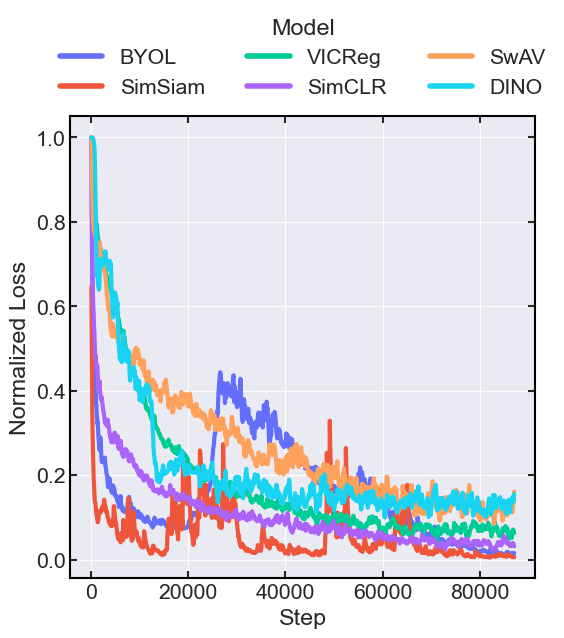

In [76]:
fig, ax = plt.subplots(figsize=(6, 6))
ax_thiccify(ax)
sns.lineplot(
    data=plot_df,
    x="Step",
    y="Normalized Loss",
    hue="Model",
    lw=3,
    legend="full",
    ax=ax,
    palette=px.colors.qualitative.Plotly,
)
legend = plt.legend()
for line in legend.get_lines():
    line.set_linewidth(4)
sns.move_legend(
    ax, "lower center", bbox_to_anchor=(.5, 1), title="Model", ncol=3, frameon=False
)
plt.savefig("../reports/figures/knn_loss.png", bbox_inches="tight")
plt.show()

In [77]:
plot_columns = ["Step", "BYOL", "SimSiam", "VICReg", "SimCLR", "SwAV", "DINO"]
plot_df = pd.melt(
    rep_df[plot_columns].ewm(alpha=0.2).mean(), id_vars="Step", var_name="Model", value_name="Standard Deviation"
)
plot_df

,Step,Model,Standard Deviation
0,99.000000,BYOL,0.011592
1,210.111111,BYOL,0.011643
2,267.032787,BYOL,0.011421
3,311.737127,BYOL,0.011387
4,367.443598,BYOL,0.011425
...,...,...,...
5995,86721.725271,DINO,0.013648
5996,86817.180217,DINO,0.013826
5997,86903.544174,DINO,0.013958
5998,87002.635339,DINO,0.014140


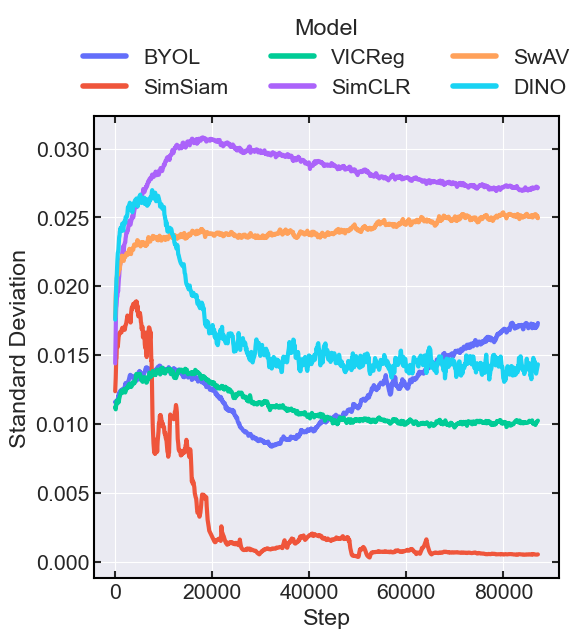

In [78]:
fig, ax = plt.subplots(figsize=(6, 6))
ax_thiccify(ax)
sns.lineplot(
    data=plot_df,
    x="Step",
    y="Standard Deviation",
    hue="Model",
    lw=3,
    legend="full",
    ax=ax,
    palette=px.colors.qualitative.Plotly,
)
legend = plt.legend()
for line in legend.get_lines():
    line.set_linewidth(4)
sns.move_legend(
    ax, "lower center", bbox_to_anchor=(.5, 1), title="Model", ncol=3, frameon=False
)
plt.savefig("../reports/figures/knn_std.png", bbox_inches="tight")
plt.show()

## Code Graveyard 💀🪦

Conclusions:
- Use Arial font for consistency with matplotlib
- Seaborn template is nice
- px.colors.qualitative.D3 is a nice alternative to px.colors.qualitative.Plotly
- figure size scaling is much harder in plotly than with seaborn

In [5]:
# import plotly.express as px

# plot_df = pd.melt(f1_df[plot_columns], id_vars=["Step"], var_name="Model", value_name="F1 Score")
# fig = px.line(
#     plot_df,
#     x="Step",
#     y="F1 Score",
#     color="Model",
#     width=700,
#     height=400,
#     color_discrete_sequence=px.colors.qualitative.Plotly,
# )
# # set all margins except left to 0
# fig.update_layout(margin=dict(r=0, t=0, b=0), font_size=20, font_family="Dejavu Sans", template="seaborn")
# fig.update_traces(line_width=4, opacity=0.9)
# fig.write_image("fig.png", scale=3)
# fig.show()

# fig = px.line(
#     plot_df,
#     x="Step",
#     y="F1 Score",
#     color="Model",
#     width=700,
#     height=400,
#     color_discrete_sequence=px.colors.qualitative.D3)
# # set all margins except left to 0
# fig.update_layout(margin=dict(r=0, t=0, b=0), font_size=20, font_family="Arial", template="seaborn")
# fig.update_traces(line_width=4, opacity=0.9)
# fig.write_image("fig1.png", scale=3)
# fig.show()

In [ ]:
# def merge_dfs(source_path, save_path=None):
#     """Merge all csv files in a directory into one dataframe"""
#     all_dfs = []
#     for file in os.listdir(source_path):
#         df = pd.read_csv(os.path.join(source_path, file))

#         # File name format: run-BYOL-tag-knn_accuracy.csv
#         model_name = file.split("-")[1]
#         # Some spelling mistakes:
#         if model_name == "Moco":
#             model_name = "MoCo"
#         elif model_name == "SwaV":
#             model_name = "SwAV"
#         elif model_name == "MAE":
#             continue # We only want MAE2
#         elif model_name == "MAE2":
#             model_name = "MAE"

#         # We don't care about the wall time column
#         df.drop(columns=["Wall time"], inplace=True)
        
#         # Rename the value column to the model name
#         df.rename(columns={"Value": model_name}, inplace=True)
#         all_dfs.append(df)
    
#     # Merge all dataframes into one
#     # First, merge the first two dataframes
#     merged_df = pd.merge(all_dfs[0], all_dfs[1], on=["Step"], how="left")
#     # Then, merge the rest of the dataframes
#     for df in all_dfs[2:]:
#         merged_df = pd.merge(merged_df, df, on=["Step"], how="left")

#     # In case of row count mismatch, interpolate missing values
#     merged_df.interpolate(method="linear", inplace=True)

#     # Save to file. As a sanity check, confirm read-file is the same.
#     if save_path is not None:
#         merged_df.to_pickle(f"{save_path}.pkl.xz", compression="xz")
#     read_df = pd.read_pickle(f"{save_path}.pkl.xz")
#     assert merged_df.equals(read_df), "Saved and read df are not the same!"

#     return merged_df


# root_dir = "../data/interim/model_logs/"
# save_dir = "../data/processed/model_logs/"

# f"{root_dir}/accuracy"

# accuracy_df = merge_dfs(
#     os.path.join(root_dir, "accuracy"),# save_path=os.path.join(save_dir, "knn_accuracy")
# )
# f1_df = merge_dfs(
#     os.path.join(root_dir, "f1"),# save_path=os.path.join(save_dir, "knn_f1")
# )
# loss_df = merge_dfs(
#     os.path.join(root_dir, "loss"),# save_path=os.path.join(save_dir, "knn_loss")
# )
# rep_std_df = merge_dfs(
#     os.path.join(root_dir, "rep_std"),# save_path=os.path.join(save_dir, "knn_rep_std")
# )

In [6]:
# plot_df = pd.melt(f1_df[plot_columns], id_vars=["Step"], var_name="Model", value_name="F1 Score")
# fig = px.line(
#     plot_df,
#     x="Step",
#     y="F1 Score",
#     color="Model",
#     width=700,
#     height=400,
#     color_discrete_sequence=px.colors.qualitative.Plotly,
# )
# # set all margins except left to 0
# fig.update_layout(margin=dict(r=0, t=0, b=0), font_size=20, font_family="DejaVu Sans")
# fig.update_traces(line_width=4, opacity=0.9)
# # fig, scale = matplotlibify(fig)
# fig.write_image("fig5.png", scale=2.5)
# fig.show()

# fig = px.line(
#     plot_df,
#     x="Step",
#     y="F1 Score",
#     color="Model",
#     width=700,
#     height=400,
#     color_discrete_sequence=px.colors.qualitative.Plotly,
# )
# # set all margins except left to 0
# fig.update_traces(line_width=4, opacity=0.9)
# fig.update_layout(template="seaborn")
# fig, scale = matplotlibify(fig)
# fig.write_image("fig3.png", scale=scale)
# fig.show()

# fig = px.line(
#     plot_df,
#     x="Step",
#     y="F1 Score",
#     color="Model",
#     width=700,
#     height=400,
#     color_discrete_sequence=px.colors.qualitative.Plotly,
# )
# # set all margins except left to 0
# fig.update_traces(line_width=4, opacity=0.9)
# fig.update_layout(template="plotly")
# fig, scale = matplotlibify(fig)
# fig.write_image("fig4.png", scale=scale)
# fig.show()